In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define exact colors for each category
colors = ["#FF0000", "#00FF00", "#0000FF"]
colors = ["blue", "red", "lightgrey"]
custom_cmap = ListedColormap(colors)

def plot_results(axes, results_df, llr_top_mean_activity, dataset):

    rounds = results_df["round_num"].astype(int)
    axes.errorbar(rounds, results_df["mean_score"],
                  yerr=results_df["stddev"], fmt='-o', capsize=5, label='Active Learning')
    axes.set_title(f'{dataset}', fontsize=16)
    axes.set_ylabel('Mean Activity', fontsize=14)
    axes.set_xlabel('Round', fontsize=14)
    axes.set_xticks(rounds)
    # Add horizontal dashed line for LLR
    axes.axhline(llr_top_mean_activity, color='black', linestyle='--', label='Log Likelihood Ratio')
    axes.legend()
    # plt.colorbar(scatter, ax=axes, label="Label")



In [3]:
datasets = [
    "ADRB2",
    "AICDA",
    "BRCA1",
    "BRCA2",
    "CALM1",
    "CAR11",
    "CASP3",
    "CASP7",
    "CBS",
    "GDIA",
    "GRB2",
    "HEM3",
    "HMDH",
    "HXK4",
    "KCNE1",
    "KCNH2",
    "MET",
    "MK01",
    "MSH2",
    "MTHR",
    "NPC1",
    "OTC",
    "P53",
    "PAI1",
    "PPARG",
    "PPM1D",
    "PTEN",
    "RAF1",
    "RASH",
    "S22A1",
    "SC6A4",
    "SCN5A",
    "SERC",
    "SHOC2",
    "SRC",
    "SUMO1",
    "SYUA",
    "TADBP",
    "TPK1",
    "TPOR",
    "UBC9",
    "VKOR1",
    "brenan",
    "cas12f",
    "cov2_S",
    "doud",
    "giacomelli",
    "haddox",
    "jones",
    "kelsic",
    "lee",
    "markin",
    "stiffler",
    "zikv_E"]


/home/claudiof/gitrepo/msalde/venv_msalde/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


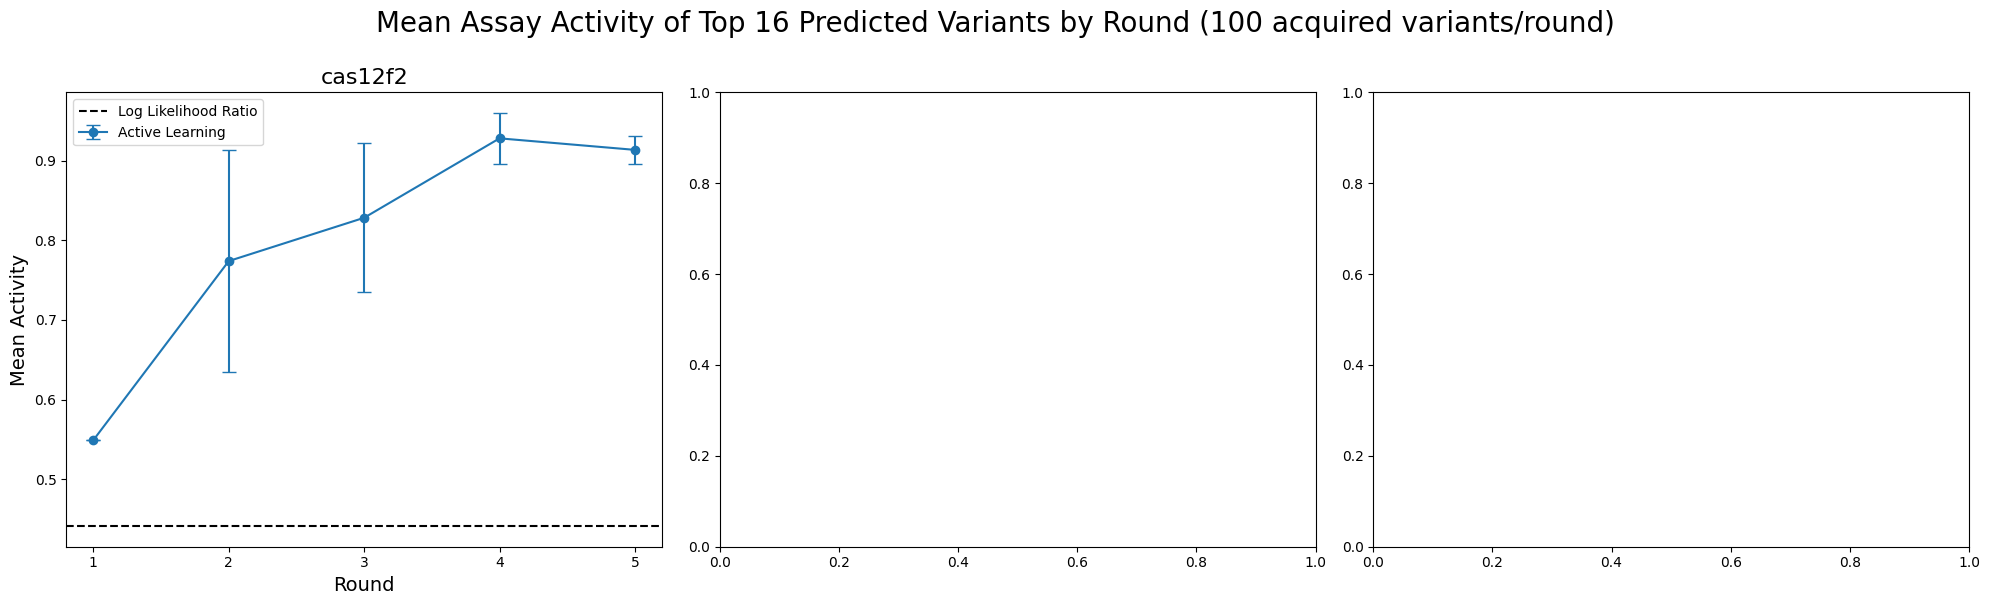

In [ ]:
import context  # noqa: F401
from msalde.container import ALDEContainer

# datasets = ["cas12f2"]
container = ALDEContainer("./config/msaldem.yaml")
# container = ALDEContainer("./config/msalde.yaml")
repo = container.query_repository

datasets_ = datasets # [:5]
# datasets_ = ["cas12f2"]

num_rows = len(datasets_) // 3 + int(len(datasets_) % 3 > 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6*num_rows))
axes = axes.flatten()
ind = 0
for dataset in datasets_:
    results = repo.get_mean_activity_of_top_variants_by_round(
        dataset_name=dataset, learner_name="RF_AL")
    if len(results) == 0:
        continue
    llr_results = repo.get_mean_activity_of_top_variants_by_round(
        dataset_name=dataset, learner_name="ESM2_LLR")
    if len(llr_results) == 0:
        continue
    llr_results = llr_results[llr_results["round_num"] == 2]
    llr_top_mean_activity = llr_results["mean_score"].values[0]
    plot_results(axes[ind], results, llr_top_mean_activity, dataset)
    ind += 1

# plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Mean Assay Activity of Top 16 Predicted Variants by Round (100 acquired variants/round)', fontsize=20, y=1.0)
plt.tight_layout()
plt.show()


In [ ]:
import os

import context  # noqa: F401
from msalde.container import ALDEContainer

datasets = ["cas12f2"]
container = ALDEContainer("./config/msaldem.yaml")
repo = container.query_repository
cols = 2

num_rows = (len(datasets) * cols) // cols + (len(datasets) % cols > 0)
fig, axes = plt.subplots(num_rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    llr_results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="ESM2_LLR")
    ind = i
    # ind += 1
    plot_results(axes[ind], llr_results, dataset, "LogLikelihood")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
